<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Applied_Statistics/Binomial_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Biostatistics - Binomial Test**



<img src="https://cdna.artstation.com/p/assets/images/images/007/699/792/large/dariusz-andrulonis-1-jadronr3-plemnikami2-175.jpg?1507922501" width="400" height="300">

**Image taken from**: [Dariusz Andrulonis](https://dariuszandrulonis.artstation.com/projects/xRqOY?album_id=992479)



#**Testing a proportion: the binomial test**
---
A study of 25 genes involved in spermatogenesis (sperm formation) found locations in the mouse genome. The study was carried out to test a prediction of evolutionary theory that such genes should occur disproportionately often on the X chromosome. As it turned out, 10 out of the 25 spermatogenesis genes (40%) were on the X chromosome (Wang et al. 2001). *If genes for spermatogenesis occurred "randomly" throughout the genome, then we would expect only 6.1% of them to fall on the X chromosome, because the X chromosome contains 6.1% of the genes in the genome.*

##**Hypotheses:**
- **H0:** The probability that a spermatogenesis gene falls on the X chromosome is *p* = 0.061.
- **Ha:** The probability that a spermatogenesis gene falls on the X chromosome is something other than 0.061 *p* =! 0.061.

**Note the asymmetry of these two hypothesis. The null hypothesis is very specific, while the alternative hypothesis is not specific, referring to every other possibility. Also note that there are two ways to reject the null hypothesis: there can be an excess of spermetatogenesis genes on the X chromosome (i.e., *p* > 0.061) or there can be too few (i.e., *p* < 0.061). Therefore, the test is two-sided.**  

##**1. Generate the Binomial Distribution**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters for the binomial distribution

def binomial_test(n, p):
# Generate the binomial distribution for different outcomes
  x = np.arange(10, n + 1)
  probabilities = binom.pmf(x, n, p)
  df = pd.DataFrame({
    'Number of Genes on X': x,
    'Probability under the null hypothesis': probabilities
  })
  return df

In [ ]:
n = 25 #umber of genes
p = 0.061 # Probability that a spermatogenesis gene falls on the X chromosome
df = binomial_test(n, p)
df

,Number of Genes on X,Probability under the null hypothesis
0,10,9.071211e-07
1,11,8.035781e-08
2,12,6.090306e-09
3,13,3.956429e-10
4,14,2.203032e-11
5,15,1.049510e-12
6,16,4.261188e-14
7,17,1.465509e-15
8,18,4.231266e-17
9,19,1.012696e-18


In [ ]:
#We sum the probabilities from 10 onwards. i.e. P(X>=10)
x = np.arange(10, n + 1)
probabilities = binom.pmf(x, n, p)
p_X_10 = np.sum(probabilities)
p_value = 2*p_X_10
p_value
print(f'Assuming that the null hypothesis is true, there is a probability of \ngetting 10 or more spermatogenesis genes on the X chromosome of: {p_X_10:.2e}')

Assuming that the null hypothesis is true, there is a probability of 
getting 10 or more spermatogenesis genes on the X chromosome of: 5.75e-01


In [ ]:
from scipy.stats import binomtest
#from scipy import stats
# Data from the study
x_genes = 10   # Number of spermatogenesis genes on the X chromosome
n = 25           # Total number of spermatogenesis genes
p_null = 0.061   # Null hypothesis proportion (proportion of genes on X chromosome in general)

# Perform a one-sided binomial test
p_value = binomtest(x_genes, n, p_null, alternative='two-sided')

# Output the result

print(f"Binomial test p-value: {p_value.pvalue:.3e}")

# Interpretation of results
if p_value.pvalue < 0.05:
    print("Reject the null hypothesis: Spermatogenesis genes are \ndisproportionately located on the X chromosome.")
else:
    print("Fail to reject the null hypothesis: No significant difference in \nthe proportion of genes on the X chromosome.")

Binomial test p-value: 9.940e-07
Reject the null hypothesis: Spermatogenesis genes are 
disproportionately located on the X chromosome.


##**2. Plot the Binomial Distribution**

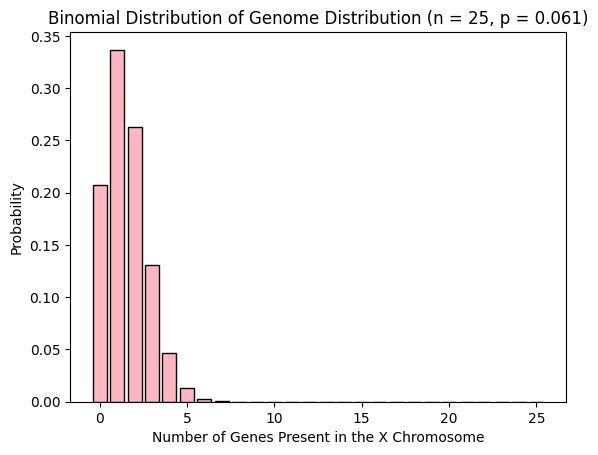

In [ ]:
#n = 25
#p = 0.061
x = np.arange(0, n + 1)
probabilities = binom.pmf(x, n, p)
plt.bar(x,
        probabilities,
        color = 'lightpink',
        edgecolor = 'black'
        )

plt.title('Binomial Distribution of Genome Distribution (n = 25, p = 0.061)')
plt.xlabel('Number of Genes Present in the X Chromosome')
plt.ylabel('Probability')
#plt.xticks(x)
plt.show()

##**3. Calculate distinct Probabilities** (Pending)

In [ ]:
# Calculate the probability of exactly 10 spermatogenesis genes present in the X chromosome
exact_10 = binom.pmf(10, n, p_null)
print(f'Probability of exactly 10 spermatogenesis genes are in the X chromosome: {exact_10}')

# Calculate the probability of fewer than 10 spermatogenesis genes present in the X chromosome
less_than_10 = binom.cdf(9, n, p_null)
print(f'Probability of fewer than 10 spermatogenesis genes present in the X chromosome: {less_than_10}')

# Calculate the probability of more than 10 spermatogenesis genes present in the X chromosome
more_than_10 = 1 - binom.cdf(11, n, p_null)
print(f'Probability of more than 10 spermatogenesis genes present in the X chromosome: {more_than_10}')

Probability of exactly 10 spermatogenesis genes are in the X chromosome: 9.071211000202529e-07
Probability of fewer than 10 spermatogenesis genes present in the X chromosome: 0.9999990060120183
Probability of more than 10 spermatogenesis genes present in the X chromosome: 6.509072947302741e-09


**Explanation:**

    Parameters of the Binomial Distribution:

        n = 25: The number of posible number of spermatogenesis genes present on the X chromosome.  
        p = 0.061: # Null hypothesis proportion (proportion of genes on X chromosome in general)

    Binomial Probability Mass Function (PMF):

        The binom.pmf function calculates the probability of each possible outcome (0 to 25 genes positively present in the X chromosome).

    Visualization:

        The outcomes are visualized with a bar plot, making it easier to interpret the distribution of responses.

    Specific Probabilities:

        We calculate and print the probability of:
            exactly 10 spermatogenesis genes present in the X chromosome.
            fewer than 10 spermatogenesis genes present in the X chromosome.
            More than 10 spermatogenesis genes present in the X chromosome.

**Discussion Questions:**
---

1. **Conduct the Binomial Test:**

Perform a binomial test in Python to test whether the proportion of spermatogenesis genes on the X chromosome (10 out of 25) is significantly different from the expected proportion of 6.1%. Report the p-value. Is there enough evidence to reject the null hypothesis at a significance level of 0.05?



2. **Interpret the Results:**

Based on the p-value obtained from the binomial test, interpret whether the occurrence of spermatogenesis genes on the X chromosome is consistent with random distribution across the genome. What biological conclusions can you draw from this result?



3. **Effect of Sample Size:**

Simulate another scenario where the study was conducted with 50 spermatogenesis genes, keeping the observed proportion on the X chromosome the same (40%). Perform the binomial test again. How does increasing the sample size affect the p-value and the statistical significance of the result?



4. **Confidence Interval for Proportion:**

Calculate a 95% confidence interval for the observed proportion of spermatogenesis genes on the X chromosome (10 out of 25). Does this confidence interval include the expected proportion of 6.1%? What does this suggest about the hypothesis?



5. **Exploring Alternative Hypotheses:**

Perform a one-tailed binomial test to evaluate whether the proportion of spermatogenesis genes on the X chromosome is greater than 6.1%, rather than simply different from it. How does this test differ from the two-tailed test? What biological interpretation can you make if the one-tailed test is significant?